### Quantitative Analysis of Stock Market using Python


In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"


In [8]:
stocks = pd.read_csv('stocks.csv')

In [10]:
stocks.head(3)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100


In [11]:
stocks.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [12]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [13]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


To perform a quantitative analysis, we can explore various statistical concepts like descriptive statistics, time series analysis, correlation analysis, and more. Here are some potential analyses we can perform:

**Descriptive Statistics**: Summary statistics (mean, median, standard deviation, etc.) for each stock.

**Time Series Analysis**: Trends and patterns over time, especially for closing prices.

**Volatility Analysis**: How much the stock price fluctuates over a period.

**Correlation Analysis**: How stock prices of different companies are related to each other.

**Comparative Analysis**: Comparing the performance of different stocks.

Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

#### Descriptive Statistics

In [14]:
descriptive_stat=stocks.groupby('Ticker')['Close'].describe()

In [15]:
descriptive_stat

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


In [29]:
stocks.groupby('Ticker')['High'].sum()

Ticker
AAPL     9887.370026
GOOG     6311.135994
MSFT    17221.390045
NFLX    20624.180054
Name: High, dtype: float64

In [28]:
stocks.groupby('Ticker')['Low'].sum()

Ticker
AAPL     9713.580002
GOOG     6154.298004
MSFT    16865.719955
NFLX    20015.370026
Name: Low, dtype: float64

- Here, Apple and Google Statistics are same but mean closing price is 100.63 and std 6.28, indicating Less Variability in closing Price compare to Apple.

- And Microsoft has higher closing price, higher std compare to AAPL & GOOG and Netflix has its descent prices.

#### Time Series Analysis

In [30]:
stocks['Date'] = pd.to_datetime(stocks['Date'])


In [31]:
pivot_table = stocks.pivot(index='Date',columns='Ticker', values='Close')

In [32]:
pivot_table

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007
...,...,...,...,...
2023-05-01,169.589996,107.709999,305.559998,324.119995
2023-05-02,168.539993,105.980003,305.410004,317.549988
2023-05-03,167.449997,106.120003,304.399994,319.299988


In [33]:
import seaborn as sns

A series graph using Seaborn

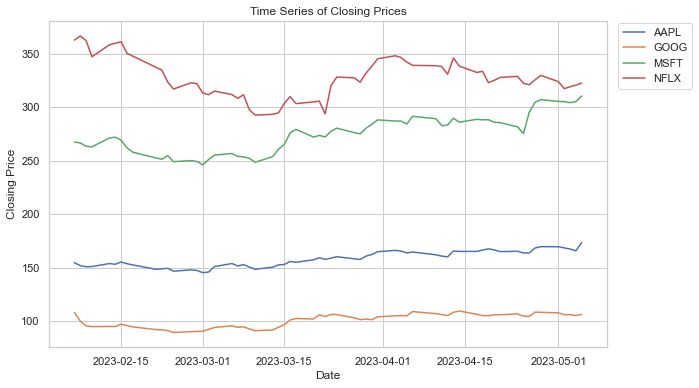

In [44]:
# Set the style for seaborn
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each column as a line
for column in pivot_table.columns:
    sns.lineplot(x=pivot_table.index, y=pivot_table[column], label=column, ax=ax)

# Set labels and title
ax.set(xlabel='Date', ylabel='Closing Price', title='Time Series of Closing Prices')

# Add legend
ax.legend(title='Ticker', loc='upper right')

plt.legend(bbox_to_anchor=(1.01,1.01))

# Saving image
plt.savefig('Time Series of stocks.webp',bbox_inches='tight')
plt.show()


The above plot displays the time series of the closing prices for each stock (AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

Trend: Each stock shows its unique trend over time. For instance, AAPL and MSFT exhibit a general upward trend in this period.


Volatility: There is noticeable volatility in the stock prices. For example, NFLX shows more pronounced fluctuations compared to others.


Comparative Performance: When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this datase

#### Volatility Analysis

In [45]:
Volatility = pivot_table.std().sort_values(ascending=False)
Volatility

Ticker
NFLX    18.554419
MSFT    17.676231
AAPL     7.360485
GOOG     6.279464
dtype: float64

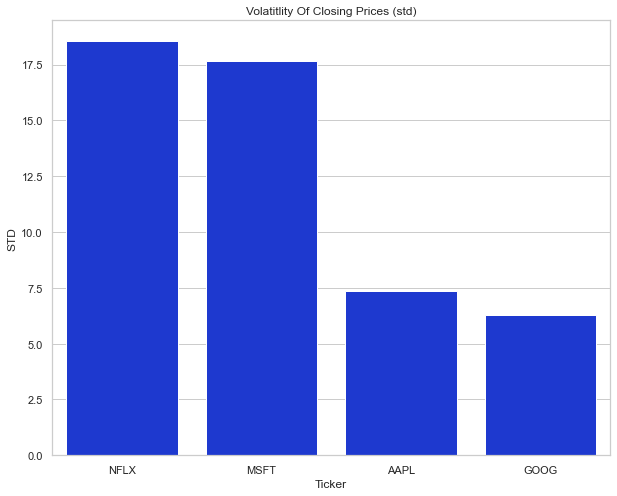

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(data=Volatility)
plt.title('Volatitlity Of Closing Prices (std)')
plt.xlabel('Ticker')
plt.ylabel('STD')
plt.show()

In [52]:
type(Volatility)

pandas.core.series.Series

The bar chart and the accompanying data show the volatility (measured as standard deviation) of the closing prices for each stock. Here’s how they rank in terms of volatility:

NFLX: Highest volatility with a standard deviation of approximately 18.55.

MSFT: Next highest, with a standard deviation of around 17.68.

AAPL: Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.

GOOG: The least volatile in this set, with a standard deviation of approximately 6.28.

It indicates that NFLX and MSFT stocks were more prone to price fluctuations during this period compared to AAPL and GOOG.

#### Correlation Analysis

In [59]:
pivot_table.corr()

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.901662,0.953037,0.154418
GOOG,0.901662,1.000000,0.884527,0.201046
MSFT,0.953037,0.884527,1.000000,0.191273
NFLX,0.154418,0.201046,0.191273,1.000000


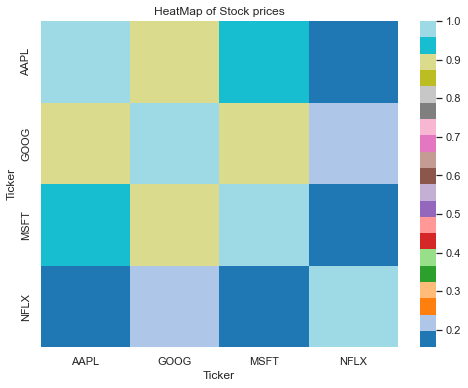

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table.corr(),cmap='tab20')
plt.title('HeatMap of Stock prices')
plt.show()

The heatmap above displays the correlation matrix of the closing prices of the four stocks (AAPL, GOOG, MSFT, NFLX). Here’s what the correlation coefficients suggest:

>Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.

>Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.

>Values around 0 indicate a lack of correlation.

From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, AAPL and MSFT seem to have a relatively higher positive correlation.

#### Comparative Analysis

In [69]:
percentage_change = ((pivot_table.iloc[-1] - pivot_table.iloc[0]) / pivot_table.iloc[0]) * 100


In [70]:
percentage_change

Ticker
AAPL    12.234086
GOOG    -1.689193
MSFT    16.104798
NFLX   -11.073151
dtype: float64

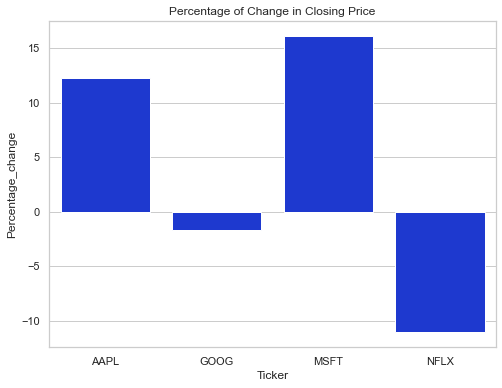

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(percentage_change)
plt.title('Percentage of Change in Closing Price')
plt.xlabel('Ticker')
plt.ylabel('Percentage_change')
plt.show()

The bar chart and the accompanying data show the percentage change in the closing prices of the stocks from the start to the end of the observed period:

>MSFT: The highest positive change of approximately 16.10%.

>AAPL: Exhibited a positive change of approximately 12.23%. It indicates a solid performance, though slightly lower than MSFT’s.

>GOOG: Showed a slight negative change of about -1.69%. It indicates a minor decline in its stock price over the observed period.

>NFLX: Experienced the most significant negative change, at approximately -11.07%. It suggests a notable decrease in its stock price during the period.

In [76]:
#The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.
daily_return = pivot_table.pct_change().dropna()

In [77]:
avg_daily_return = daily_return.mean()

In [78]:
risk = daily_return.std()

<Axes: xlabel='Ticker'>

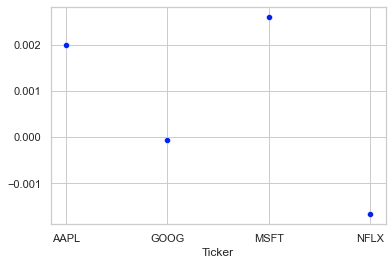

In [82]:
sns.scatterplot(avg_daily_return)

### Summary

This shows how Quantitative Analysis of the Stock Market Using Pandas,Here, We used unique Mathematical and Statistical Technique to draw an analysis from Stocks data. Also Visualization show some meaning-full insights to Data for Further Analysis